In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, f1_score, precision_recall_fscore_support
import matplotlib.pyplot as plt
import itertools
import time
import numpy as np
from matplotlib import pyplot


In [2]:
df = pd.read_csv('data/latest_data.csv',index_col='Unnamed: 0')
df.head()

/Users/laurentvanhassel/anaconda3/lib/python3.8/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,backers_count,category,country_displayable_name,created_at,deadline,goal,launched_at,pledged,staff_pick,state,...,sub_category,blurb_length,launch_to_deadline,creation_to_launch,launch_day,deadline_day,launch_month,deadline_month,launch_time,deadline_time
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
0,3,food,the United States,2014-08-30 01:10:21,2014-10-02 15:44:07,400.0,2014-09-02 15:44:07,15.0,False,failed,...,small batch,28.0,30,3,Tuesday,Thursday,September,October,2pm-4pm,2pm-4pm
1,6,technology,the United Kingdom,2015-02-18 17:15:56,2015-03-20 20:59:26,200.0,2015-02-18 21:59:26,28.0,False,failed,...,software,22.0,29,0,Wednesday,Friday,February,March,8pm-10pm,8pm-10pm
2,90,photography,the United States,2018-07-28 02:07:21,2018-08-27 13:18:38,2500.0,2018-07-28 13:18:38,4350.0,False,successful,...,photobooks,18.0,30,0,Saturday,Monday,July,August,12pm-2pm,12pm-2pm
3,205,photography,the United Kingdom,2018-02-10 14:42:07,2018-04-05 06:42:32,9500.0,2018-03-06 07:42:32,10181.0,False,successful,...,photobooks,19.0,29,23,Tuesday,Thursday,March,April,6am-8am,6am-8am
4,35,art,the United States,2012-07-25 23:21:04,2012-09-11 03:59:00,4000.0,2012-08-27 20:40:13,4254.0,False,successful,...,public art,25.0,14,32,Monday,Tuesday,August,September,8pm-10pm,2am-4am


In [3]:
df = df.drop(columns=['created_at', 'deadline','launched_at','backers_count','pledged','usd_pledged','staff_pick','sub_category','creation_to_launch','launch_day','deadline_day','launch_month','deadline_month','launch_time','deadline_time','launch_to_deadline'])
# df = df.drop(columns=['created_at', 'deadline','launched_at','backers_count','pledged','usd_pledged','sub_category'])

In [4]:
df.state.count()

2359293

In [5]:
df = df[df.goal >= 1000]

In [6]:
#df = df.sample(frac=0.7)
df = df.sample(n=250000)

In [7]:
df.describe()

,goal,blurb_length
count,2.500000e+05,250000.000000
mean,5.888588e+04,18.471796
std,1.366193e+06,5.233579
min,1.000000e+03,0.000000
25%,3.000000e+03,16.000000
50%,6.000000e+03,20.000000
75%,1.750000e+04,22.000000
max,1.000000e+08,35.000000


In [8]:
df.state.count()

250000

In [9]:
df['state'].value_counts()

successful    148069
failed        101931
Name: state, dtype: int64

In [10]:
df

,category,country_displayable_name,goal,state,blurb_length
Unnamed: 0,,,,,
2344530,photography,the United States,8500.0,successful,16.0
1082258,games,the United States,5000.0,successful,8.0
709130,theater,the United Kingdom,1000.0,successful,22.0
1005422,games,the United States,2000.0,failed,18.0
1167615,fashion,the United States,1300.0,failed,13.0
...,...,...,...,...,...
2188220,fashion,the United States,10000.0,successful,21.0
1435035,music,the United States,1200.0,successful,22.0
1726676,food,the United States,28000.0,failed,17.0


In [11]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import tensorflow as tf
import numpy as np

In [12]:
# cate_counts = df.launch_time.value_counts()
# cate_counts

In [13]:
df.dtypes

category                     object
country_displayable_name     object
goal                        float64
state                        object
blurb_length                float64
dtype: object

In [14]:
# need to convert bool to str
# df['staff_pick'] = df['staff_pick'].astype(str)
# df

In [15]:
df['state'] = df['state'].replace({'failed': 0, 'successful': 1})

In [16]:
# Generate our categorical variable list
df_object = df.dtypes[df.dtypes == "object"].index.tolist()

# Check the number of unique values in each column
df[df_object].nunique()
# we can see that NAME, APPLICATION_TYPE, CLASSIFICATION will all be issues



category                    15
country_displayable_name    22
dtype: int64

In [17]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(df[df_object]))

# Add the encoded variable names to the DataFrame
encode_df.columns = enc.get_feature_names(df_object)
encode_df.head()

,category_art,category_comics,category_crafts,category_dance,category_design,category_fashion,category_film & video,category_food,category_games,category_journalism,...,country_displayable_name_Mexico,country_displayable_name_New Zealand,country_displayable_name_Norway,country_displayable_name_Singapore,country_displayable_name_Spain,country_displayable_name_Sweden,country_displayable_name_Switzerland,country_displayable_name_the Netherlands,country_displayable_name_the United Kingdom,country_displayable_name_the United States
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [18]:
# Merge one-hot encoded features and drop the originals
df = df.merge(encode_df,left_index=True, right_index=True)
df = df.drop(df_object,1)
df.head()

,goal,state,blurb_length,category_art,category_comics,category_crafts,category_dance,category_design,category_fashion,category_film & video,...,country_displayable_name_Mexico,country_displayable_name_New Zealand,country_displayable_name_Norway,country_displayable_name_Singapore,country_displayable_name_Spain,country_displayable_name_Sweden,country_displayable_name_Switzerland,country_displayable_name_the Netherlands,country_displayable_name_the United Kingdom,country_displayable_name_the United States
139079,50000.0,0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
165095,120000.0,1,19.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
129342,44000.0,1,20.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
334,3500.0,0,22.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
103815,7000.0,0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [19]:
# Split our preprocessed data into our features and target arrays
y = df["state"].values
X = df.drop(["state"],1).values


# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [20]:
# Preprocess numerical data for neural network

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [21]:
len(X_train_scaled[0])

39

In [22]:
# Define the model - deep neural net
#inputs = 40
#layer one = 80 (2x inputs)
#layer two = 12
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 =  number_input_features*2
hidden_nodes_layer2 = number_input_features*2

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))


# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the Sequential model together and customize metrics
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=50)

Epoch 1/50
577/577 [==============================] - 0s 651us/step - loss: 0.6823 - accuracy: 0.5840
Epoch 2/50
577/577 [==============================] - 0s 633us/step - loss: 0.6744 - accuracy: 0.5966
Epoch 3/50
577/577 [==============================] - 0s 632us/step - loss: 0.6709 - accuracy: 0.6006
Epoch 4/50
577/577 [==============================] - 0s 637us/step - loss: 0.6672 - accuracy: 0.6054
Epoch 5/50
577/577 [==============================] - 0s 633us/step - loss: 0.6640 - accuracy: 0.6104
Epoch 6/50
577/577 [==============================] - 0s 649us/step - loss: 0.6604 - accuracy: 0.6174
Epoch 7/50
577/577 [==============================] - 0s 661us/step - loss: 0.6582 - accuracy: 0.6172
Epoch 8/50
577/577 [==============================] - 0s 664us/step - loss: 0.6556 - accuracy: 0.6242
Epoch 9/50
577/577 [==============================] - 0s 664us/step - loss: 0.6536 - accuracy: 0.6251
Epoch 10/50
577/577 [==============================] - 0s 677us/step - loss: 0.651

In [23]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

193/193 - 0s - loss: 0.6731 - accuracy: 0.6273
Loss: 0.6730700731277466, Accuracy: 0.6272978782653809


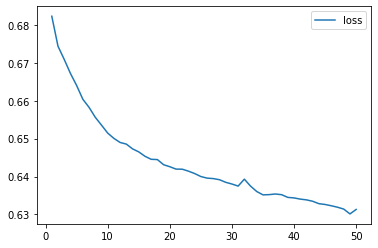

In [24]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

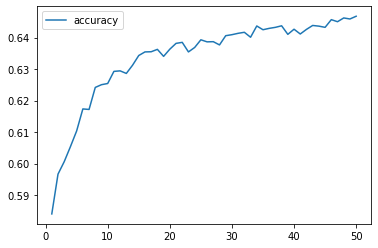

In [25]:
# Plot the loss
history_df.plot(y="accuracy")

In [26]:
# Define the logistic regression model
log_classifier = LogisticRegression(solver="lbfgs",max_iter=200)

# Train the model
log_classifier.fit(X_train,y_train)

# Evaluate the model
y_pred = log_classifier.predict(X_test)
print(f" Logistic regression model accuracy: {accuracy_score(y_test,y_pred):.3f}")

 Logistic regression model accuracy: 0.623


In [27]:
# Create a random forest classifier.
rf_model = RandomForestClassifier(n_estimators=100, random_state=78, max_features="auto", min_samples_leaf=50)

# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = rf_model.predict(X_test_scaled)
print(f" Random forest predictive accuracy: {accuracy_score(y_test,y_pred):.3f}")

 Random forest predictive accuracy: 0.646


Feature: 0, Score: 0.79580
Feature: 1, Score: 0.12718
Feature: 2, Score: 0.00368
Feature: 3, Score: 0.00363
Feature: 4, Score: 0.00244
Feature: 5, Score: 0.00198
Feature: 6, Score: 0.00265
Feature: 7, Score: 0.00343
Feature: 8, Score: 0.00395
Feature: 9, Score: 0.00508
Feature: 10, Score: 0.00264
Feature: 11, Score: 0.00520
Feature: 12, Score: 0.00604
Feature: 13, Score: 0.00277
Feature: 14, Score: 0.00390
Feature: 15, Score: 0.00473
Feature: 16, Score: 0.00260
Feature: 17, Score: 0.00145
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00347
Feature: 21, Score: 0.00021
Feature: 22, Score: 0.00104
Feature: 23, Score: 0.00166
Feature: 24, Score: 0.00044
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00077
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00079
Feature: 30, Score: 0.00026
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00048
Feature: 34, Score: 0.00043
Feature: 35, Score: 0.00000
Fe

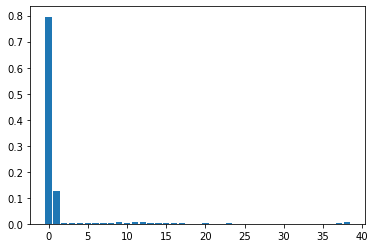

In [28]:
# get importance
importance = rf_model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [30]:
import pickle
pickle.dump(rf_model, open("model.pkl","wb"))